# QSO370 / QSO570 A Sample Analysis

This notebook serves as a quick introduction to the types of things we are trying to do with predictive analytics as well as a first introduction to Python and the Jupyter Notebook environment. In QSO370/QSO570 we'll focus on answering business-related questions to help improve various facets of the business environment (customer/employee retention, testing efficiencies of marketing campaigns, predicting sales, price/rate setting, and more). We'll use various tools in order to answer these questions and aid in informed decision-making -- some of those tools will involve advanced techniques such as predictive modeling or classification, standard statistical tools like hypothesis testing and confidence intervals, or even simple tools like numerical or graphical summaries of data.

In this first notebook, we explore A/B testing. The basic idea behind A/B testing is that a controlled experiment is run, where two or more options are tested against one another (for example, option A versus option B). Such a test helps to prevent a company from rolling out a poor product on a large scale. For example, maybe we are helping a company test which of two possible website layouts leads to the best user satisfaction. When a person lands on our web-page they are randomly shown one of the two layouts under consideration, and then they are asked a few questions about their experience before navigating away. We then run simple hypothesis tests to determine which layout is preferred by our web traffic.

Remember that I am assuming no coding background in this course. Please do not worry if the Python code you are seeing looks unfamiliar to you. Our next notebook will be a primer in Python. That being said, you should look through the code and see if you are able to understand what is being done by each code block. For now, all of the code is present and has been executed. Please feel free to experiment with the code blocks if you would like -- double-clicking on a code block gives you edit access; you can run a block of code by pressing *Shift+Enter* simultaneously; don't worry, you can't "break" anything beyond repair. While I am not expecting the Python code to be familiar to you, I am expecting that much of the remaining statistics content seems familiar to you. You should be on the lookout for the following items:
+ Exploratory data analysis
    + Computing and interpreting summary statistics (mean, median, standard deviation, quantiles) for numerical data.
    + Computing and interpreting summary statistics (frequency tables) for categorical data.
+ Data visualization
    + Constructing and interpreting appropriate plots for single numerical and categorical variables, as well as multi-dimensional plots for comparing two or more variables.
+ Using sample statistics and data visualizations to compare subgroups (here, the weeks and locations corresponding to the different promotions).
+ The use of an ANOVA test to compare more than two group means.
+ The use of $t$-tests to compare two group means.

If any of these items seem unfamiliar to you, please make an appointment to meet with me. We can discuss the background work you'll need to do in order to be successful in our course. I have resources that I can share with you.

# A/B Testing Marketing Promotions

Which promotion was the most effective?

**Scenario:**

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

**The description of the data set:**
Our data set consists of 548 entries including:
- `MarketId`: an in-house tag used to describe market types, we won't be using it
- `AgeOfStores`: Age of store in years (1–28). The mean age of a store is 8.5 years.
- `LocationID`: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- `Promotion`: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion, nor do we need to.
- `Sales` in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- `Market size`: there are three types of market size: small, medium and large.
- `Week`: One of four weeks when the promotions were run (1–4).



In [ ]:
#Don't worry so much about the code for today -- Our next notebook will be a Python primer, 
#and we'll get much more exposure throughout the course of the semester.

#Load relevant libraries (pandas is for working with tables and matplotlib is for plotting)
#pd is a standard alias for pandas (so that we can type pd.method() instead of pandas.method())
#when calling pandas functionality. Similarly, plt is a standard alias for matplotlib's pyplot
import pandas as pd
import matplotlib.pyplot as plt

#Read the data from its location on the web
#file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
#We print some basic information about the collected data.
print("Rows     : " , df.shape[0])
print("Columns  : " , df.shape[1])
print("\n Features : \n", df.columns.tolist())
print("\n Missing values : ", df.isnull().sum().values.sum(), "\n")
print("Unique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

 Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

 Missing values :  0 

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [ ]:
#The .describe() method gives us a summary for all of the numeric columns in our dataset
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


Notice that `Promotion` is interpreted as a numeric, but it shouldn't be. The same is true for `MarketID`, `MarketSize`, `LocationID`, and possibly `Week`. We can get appropriate summaries for these columns via a frequency table with the `.value_counts()` method.

In [ ]:
print("MarketID:\n", df["MarketID"].value_counts(), "\n")
print("MarketSize:\n", df["MarketSize"].value_counts(), "\n")
print("LocationID:\n", df["LocationID"].value_counts(), "\n")
print("Promotion:\n", df["Promotion"].value_counts(), "\n")
print("Week:\n", df["week"].value_counts())

MarketID:
 3     88
10    80
7     60
6     60
5     60
1     52
8     48
9     40
4     36
2     24
Name: MarketID, dtype: int64 

MarketSize:
 Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64 

LocationID:
 920    4
302    4
308    4
307    4
306    4
      ..
702    4
703    4
704    4
705    4
1      4
Name: LocationID, Length: 137, dtype: int64 

Promotion:
 3    188
2    188
1    172
Name: Promotion, dtype: int64 

Week:
 4    137
3    137
2    137
1    137
Name: week, dtype: int64


What can we say from the above output? Are there any concerns in moving forward with the test?

# EDA and Visualizations

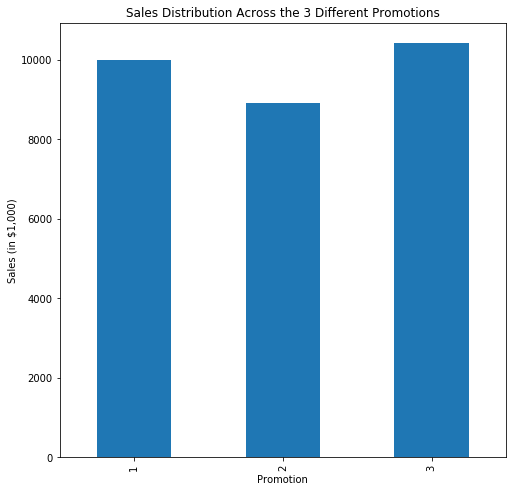

In [ ]:
# Create some plots to visual our sales and marketing data
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.bar(figsize=(8,8))
ax.set_ylabel('Sales (in $1,000)')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [ ]:
# Now let's view the promotions for each market size
## Note that the `.count()` method returns a count of the number of
## entries in each column -- since we have no missing data here, the
## counts are all identical (you can see this by removing ["MarketID"]
## from the code below and re-running the cell). The purpose of 
## ["MarketID"] is to print only a single column of counts, removing
## the redundancy.
df.groupby(['Promotion', 'MarketSize']).count()["MarketID"]

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [ ]:
# We can get a more intuitive view using the .unstack() method
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


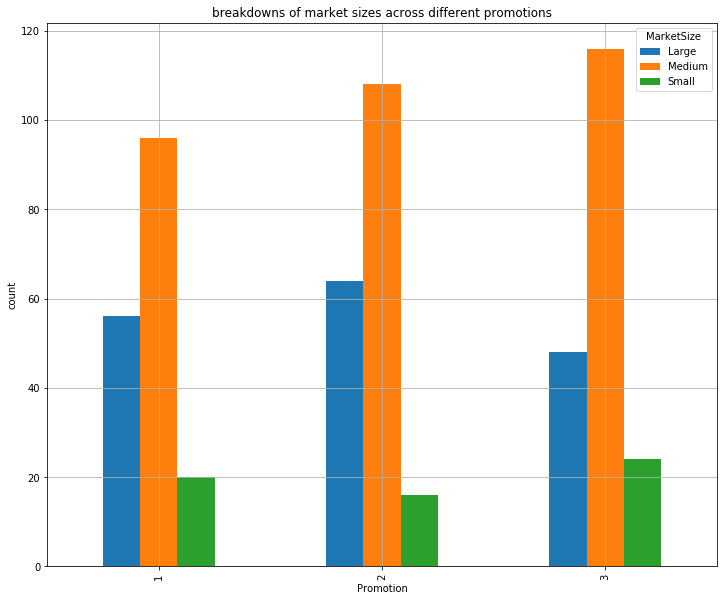

In [ ]:
# Put this into a plot
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

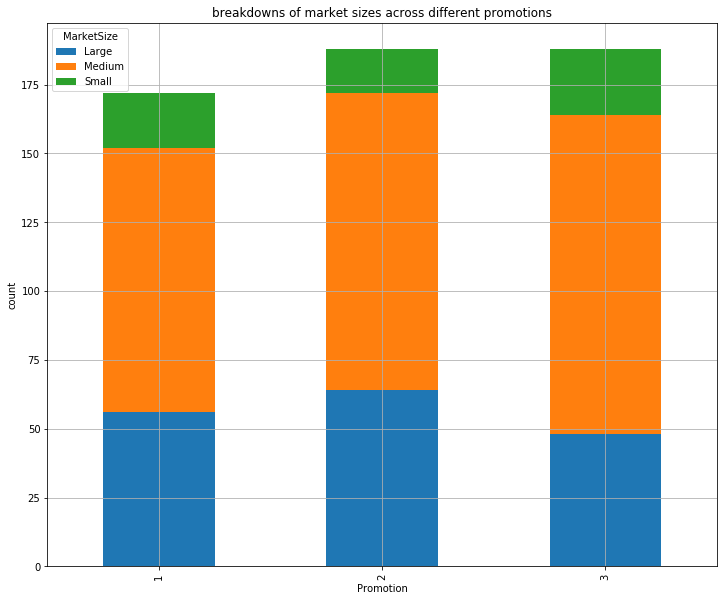

In [ ]:
# Stacking the bars can make it a bit easier compare proportions rather than raw counts -- note that this plot still shows raw counts though.
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

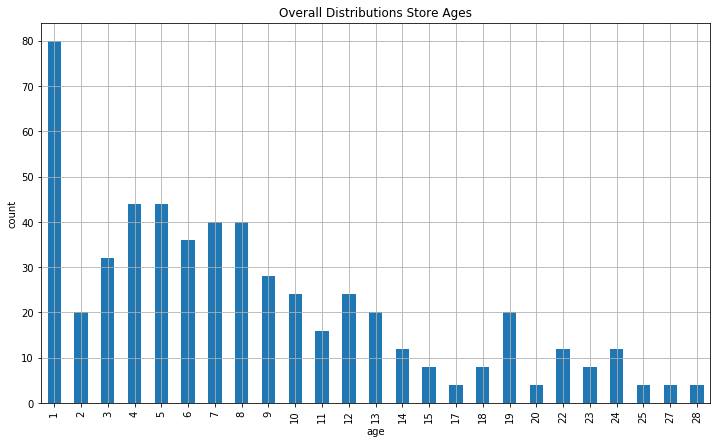

In [ ]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

In [ ]:
# Group by Age of Store and Promotion to get counts
df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack()

Promotion,1,2,3
AgeOfStore,,,
1,24.0,36.0,20.0
2,8.0,8.0,4.0
3,16.0,12.0,4.0
4,16.0,12.0,16.0
5,8.0,12.0,24.0
6,20.0,4.0,12.0
7,4.0,24.0,12.0
8,12.0,8.0,20.0
9,8.0,12.0,8.0


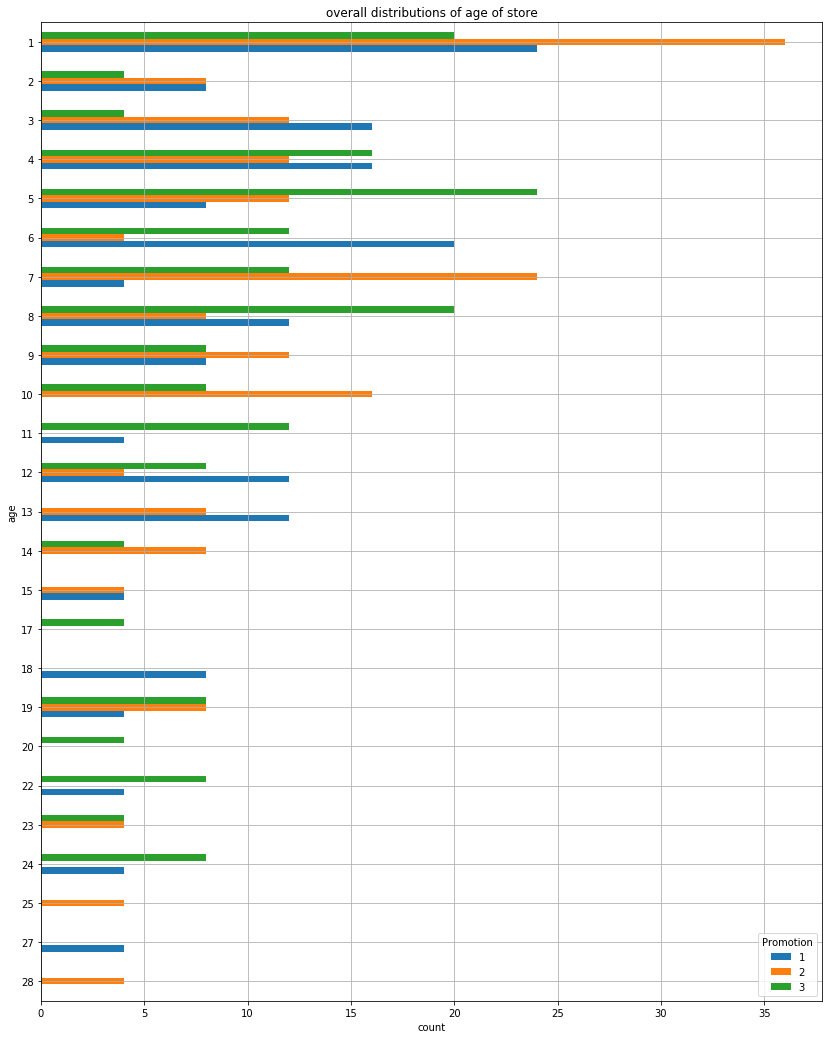

In [ ]:
# Visaulize this summary (note that the .iloc[::-1] is here to reverse the order of the y-axis so that 1 year appears at the top)
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [ ]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


This last table makes it easy to understand the overall store age distribution from our summary stats. All test groups have similar age profiles and the average store ages  is ~8 to 9 years old for theese 3 groups. The majority of the stores are 10–12 years old or even younger. We can see that the store profiles within each group are similar to each other. This indicates that our sample groups are well controlled and the A/B testing results will be trustworthy.

We are really interested in the relationship between promotion type and sales volume (in thousands of dollars here). Let's visualize that relationship (or lackthereof) and then move forward with a statistical test to determine whether we have evidence to suggest a truly superior promotion type.

<Figure size 864x1080 with 0 Axes>

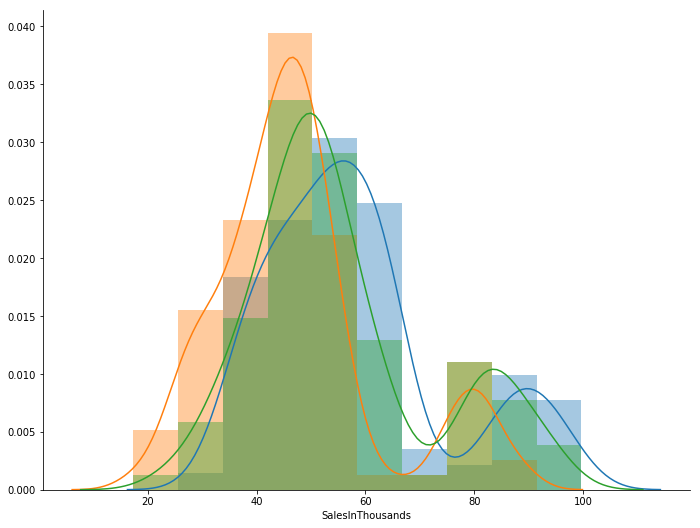

In [ ]:
import seaborn as sns
import numpy as np


_, bins = np.histogram(df["SalesInThousands"])
plt.figure(figsize = (12, 15))

g = sns.FacetGrid(df, hue="Promotion")
g = g.map(sns.distplot, "SalesInThousands", bins=bins)
g.fig.set_figwidth(12)
g.fig.set_figheight(9)

# Performing A/B Testing

In [ ]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
counts = df.groupby('Promotion').count()['SalesInThousands']
print("Means:\n", means)
print("Standard Deviations:\n", stds)
print("Sample Sizes:\n", counts)

Means:
 Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Standard Deviations:
 Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Sample Sizes:
 Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


Recall from introductory statistics that a one-way ANOVA test can be used to determine whether evidence of a significant difference between at least one of these pairs exists. The test statistic for an ANOVA test is an F-statistic (coming from the f-distribution). Large test statistics are associated with small p-values. Remember that a p-value denotes the probability that results at least as favorable to the alternative hypothesis (claiming a difference in sales due to promotion type) would have been observed just by random chance if all of the promotion mean sales were indeed equal (that is, if the null hypothesis were true).
If we let $\mu$ denote average sales, then we test the following hypotheses with our ANOVA test.
$$\begin{array}{ll} H_0: & \mu_{\text{Promotion 1}} = \mu_{\text{Promotion 2}} = \mu_{\text{Promotion 3}}\\ H_a: & \text{The average sales corresponding to at least one of the promotions differs from the others.}\end{array}$$

In [ ]:
# We conduct ANOVA and other statistical tests with scipy (scientific python) 
from scipy import stats

f, p = stats.f_oneway(df.loc[df["Promotion"] == 1, "SalesInThousands"], 
                      df.loc[df["Promotion"] == 2, "SalesInThousands"], 
                      df.loc[df["Promotion"] == 3, "SalesInThousands"])

print("f-value = ", f)
print("p-value = ", p)

f-value =  21.953485793080677
p-value =  6.765849261408714e-10


Since the p-value is very small (much less than 0.05), we have evidence that suggests at least one of the means is different from the others. Let's go looking for that pair. Remember that we can compare means of two groups using a simple t-test.

### Analysis of p-values
 Our **P-Value is close to 0** which suggests that there is good evidence to **REJECT the Null Hypothesis**. In statistical language, we have significant evidence to suggest a difference between the mean sales in at least two of our groups. Our threshold rejectings the Null Hypothesis is usually less than 0.05.

# Comparing Promotion 1 vs Promotion 2 in an A/B Test

In [ ]:
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


Our t-test comes back with a very small p-value, indicating little chance of observing samples whose means are this different if the population means are truly equal. I wonder if the other pairs differ as well.

# Comparing Promotion 1 vs Promotion 3 in an A/B Test

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results:

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# Analysis of P and t-values

We note that the average sales from promotion group 1 (58.1) is  higher than those from promotion group 3 (55.36). However, running a t-test between these two groups, gives us a t-statistic of 1.556 and a p-value of 0.121. The computed **p-value is a lot higher than 0.05**, above the threshold for statistical significance.

### What should we do?

We have significant evidence that suggests Promotion 2 is inferior (at least in comparison to Promotion 1). Let's discontinue Promotion 2. We have more work to do in regard to comparing Promotions 1 and 3 -- it is unclear whether Promotion 1 is truly better than Promotion 3 or if this observed difference was merely due to sampling variation. Would we likely observe similar results if we were to perform this experiment on a new random sampling of stores? Yes in the case of Promotion 1 versus Promotion 2, but unclear in the case of Promotion 1 versus Promotion 3.